In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import matplotlib.image as mpimg

# Read image and display it

<IPython.core.display.Javascript object>


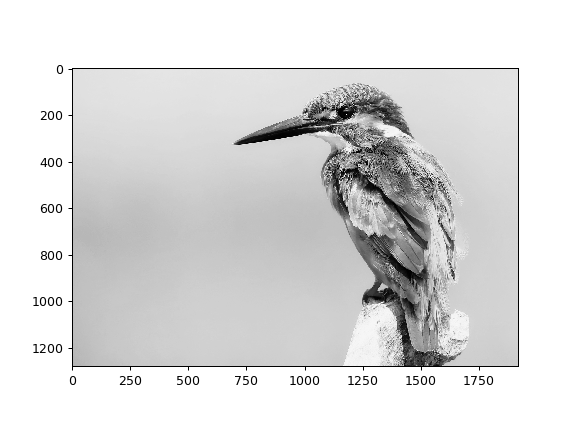

In [2]:
imgarr = imread("./kingfisher.jpg", as_grey=True)
plt.figure()
plt.imshow(imgarr, cmap="Greys_r")
plt.show()

# Show the image array properties i.e. ndim, shape etc

In [3]:
print(imgarr.ndim)
print(imgarr.shape)

2
(1279, 1920)


# Reconstruct Image from U, Sigma and V obtained from SVD

In [4]:
u, s, v = np.linalg.svd(imgarr, full_matrices=False)  # s is already sorted
s = np.diag(s)

In [5]:
print("U.ndim: {}, U.shape: {}".format(u.ndim, u.shape))
print("S.ndim: {}, S.shape: {}".format(s.ndim, s.shape))
print("V.ndim: {}, V.shape: {}".format(v.ndim, v.shape))

U.ndim: 2, U.shape: (1279, 1279)
S.ndim: 2, S.shape: (1279, 1279)
V.ndim: 2, V.shape: (1279, 1920)


<IPython.core.display.Javascript object>


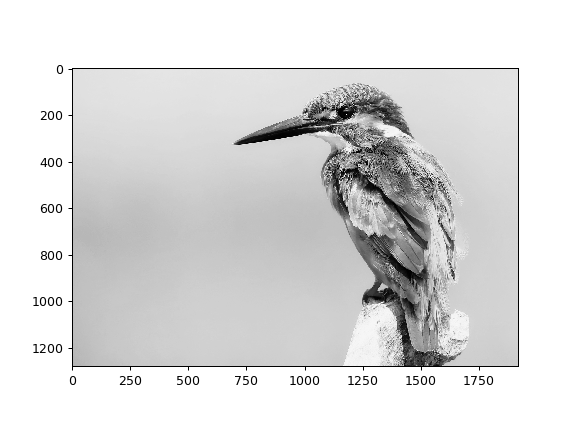

In [6]:
imgarr_reconstructed = np.dot(u, np.dot(s, v))
plt.figure()
plt.imshow(imgarr_reconstructed, cmap='Greys_r')
plt.show()

## Making sure reconstructed image is the same as the original image

In [7]:
assert np.allclose(imgarr, imgarr_reconstructed), "Original image must match reconstructed image"

# Image Compression

In [8]:
u, s, v = np.linalg.svd(imgarr, full_matrices=True)

In [9]:
print("U.ndim: {}, U.shape: {}".format(u.ndim, u.shape))
print("S.ndim: {}, S.shape: {}".format(s.ndim, s.shape))
print("V.ndim: {}, V.shape: {}".format(v.ndim, v.shape))

U.ndim: 2, U.shape: (1279, 1279)
S.ndim: 1, S.shape: (1279,)
V.ndim: 2, V.shape: (1920, 1920)


In [10]:
def plot_compressed_image(n_components_compress):
    s_dot_v = np.dot(np.diag(s[:n_components_compress]), v[:n_components_compress, :])
    u_dot_s_dot_v = np.dot(u[:, :n_components_compress], s_dot_v)
    img_reconstructed_compress = u_dot_s_dot_v
    # Matrix size of U, sigma and V
    compression_percentage = 100 - (((u.shape[0] * n_components_compress) + (n_components_compress) + (n_components_compress * v.shape[1])) * 100.0) / (imgarr.shape[0] * imgarr.shape[1])
    sigma_coverage_percentage = (100.0 * np.sum(s[:n_components_compress])) / np.sum(s)
    print("Compression    : {:>3.2f} %".format(compression_percentage))
    print("Sigma Coverage : {:>3.2f} %".format(sigma_coverage_percentage))
    plt.figure()
    plt.imshow(img_reconstructed_compress, cmap='Greys_r')
    plt.show()

## Components Chosen: 1 / 1279

Compression    : 99.87 %
Sigma Coverage : 31.57 %


<IPython.core.display.Javascript object>


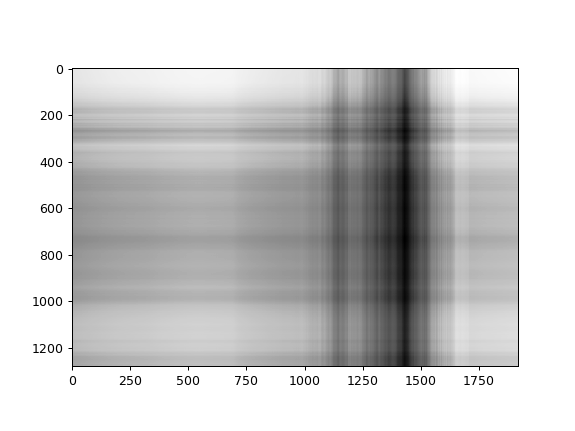

In [11]:
plot_compressed_image(1)

## Components Chosen: 2 / 1279

Compression    : 99.74 %
Sigma Coverage : 34.88 %


<IPython.core.display.Javascript object>


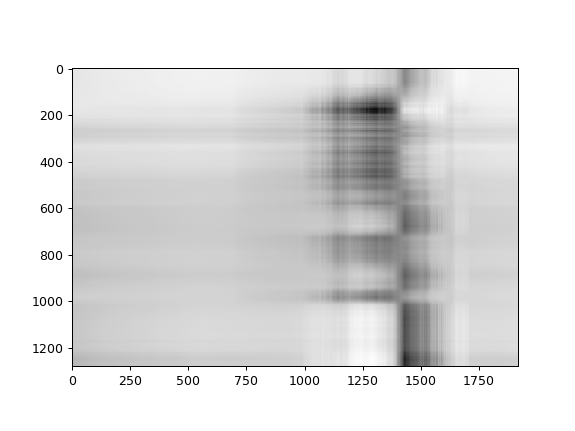

In [12]:
plot_compressed_image(2)

## Components Chosen: 3 / 1279

Compression    : 99.61 %
Sigma Coverage : 37.18 %


<IPython.core.display.Javascript object>


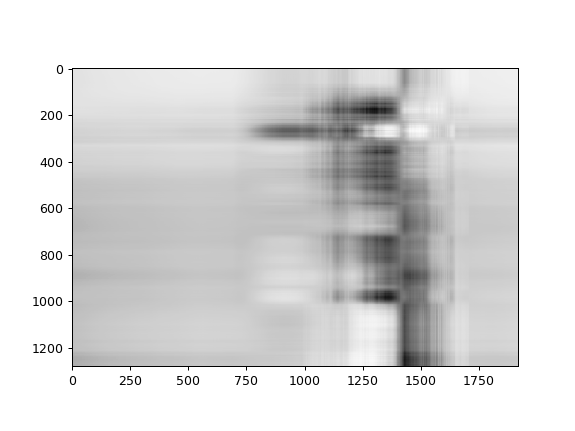

In [13]:
plot_compressed_image(3)

## Components Chosen: 5 / 1279

Compression    : 99.35 %
Sigma Coverage : 40.29 %


<IPython.core.display.Javascript object>


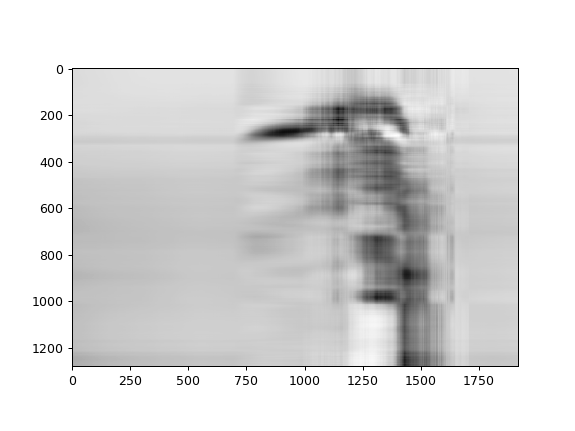

In [14]:
plot_compressed_image(5)

## Components Chosen: 10 / 1279

Compression    : 98.70 %
Sigma Coverage : 45.32 %


<IPython.core.display.Javascript object>


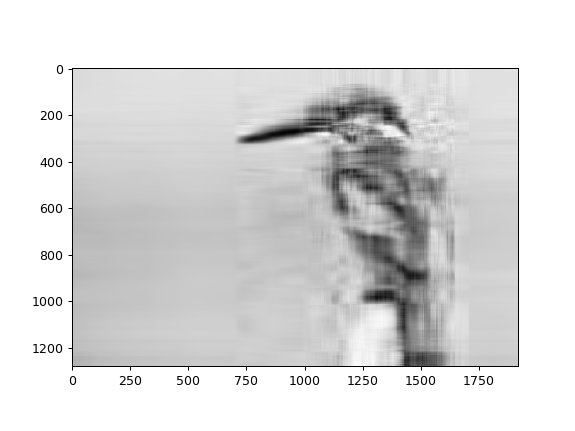

In [15]:
plot_compressed_image(10)

## Components Chosen: 50 / 1279

Compression    : 93.48 %
Sigma Coverage : 59.66 %


<IPython.core.display.Javascript object>


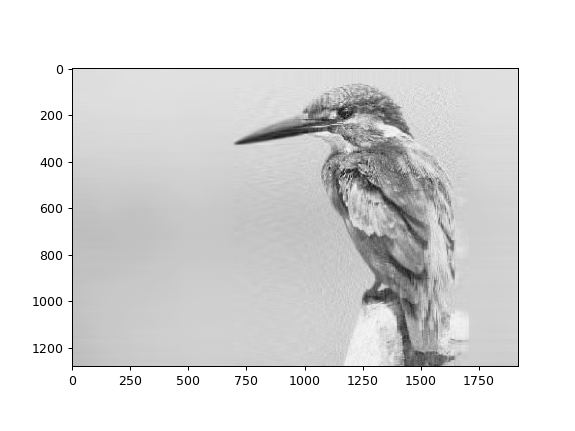

In [16]:
plot_compressed_image(50)

## Components Chosen: 100 / 1279

Compression    : 86.97 %
Sigma Coverage : 68.54 %


<IPython.core.display.Javascript object>


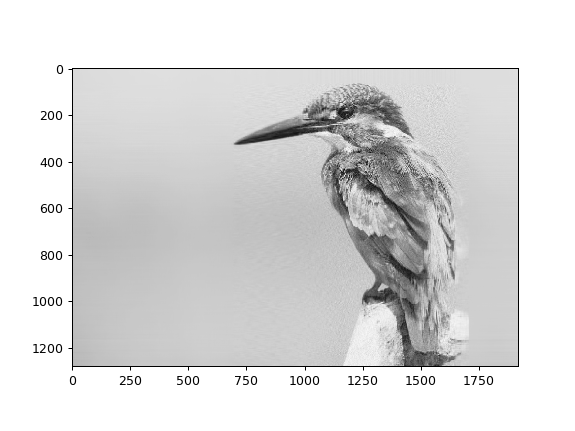

In [17]:
plot_compressed_image(100)

## Components Chosen: 200 / 1279

Compression    : 73.94 %
Sigma Coverage : 80.25 %


<IPython.core.display.Javascript object>


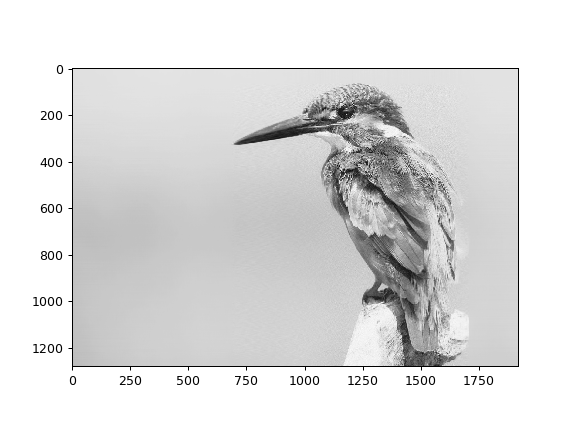

In [18]:
plot_compressed_image(200)

## Components Chosen: 500 / 1279

Compression    : 34.84 %
Sigma Coverage : 95.72 %


<IPython.core.display.Javascript object>


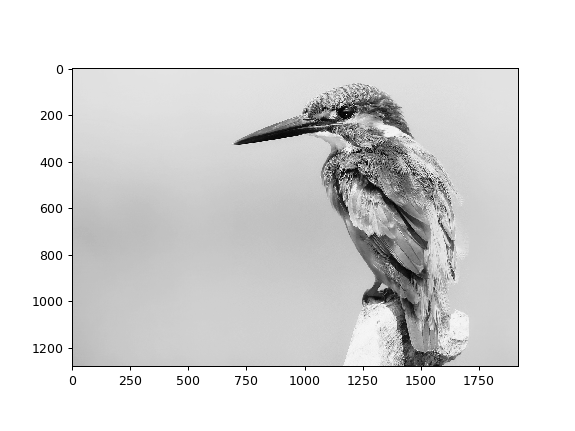

In [19]:
plot_compressed_image(500)

## Components Chosen: 768 / 1279
- Compression gains are almost zero.

Compression    : -0.08 %
Sigma Coverage : 99.09 %


<IPython.core.display.Javascript object>


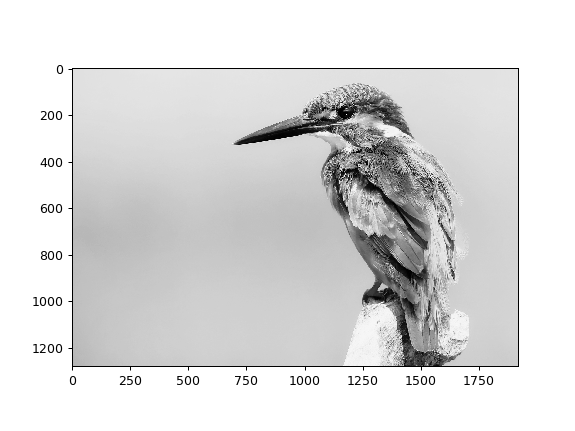

In [20]:
plot_compressed_image(768)

## Components Chosen: 1279 / 1279

### Notice the negative compression percentage?
- This is because we need to store both U and V matrices in order to reconstruct the images.
- Therefore for larger values components, we need more data than the original images to reconstruct the image. 
- We're better of using the original image or other compression techniques if we want only a small amount of compression using SVD.

Compression    : -66.67 %
Sigma Coverage : 100.00 %


<IPython.core.display.Javascript object>


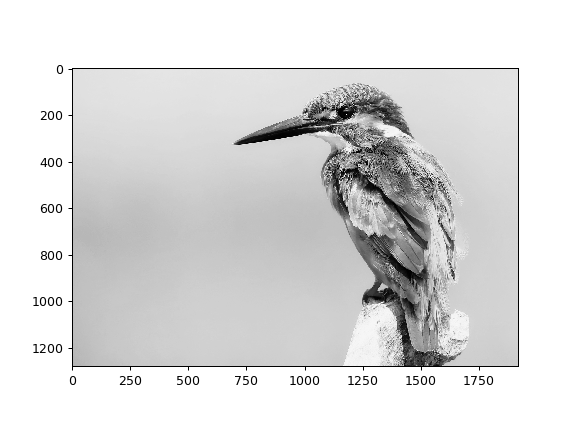

In [21]:
plot_compressed_image(1279)